In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
from tensorflow.keras import metrics
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score 
from tensorflow.keras.utils import plot_model
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, AveragePooling2D, Dropout, BatchNormalization, Activation

plt.style.use('ggplot')

In [2]:
os.listdir('/kaggle/input/digit-recognizer')

['sample_submission.csv', 'train.csv', 'test.csv']

## ***Data Loading and Preprocessing***

<AxesSubplot:xlabel='label', ylabel='count'>

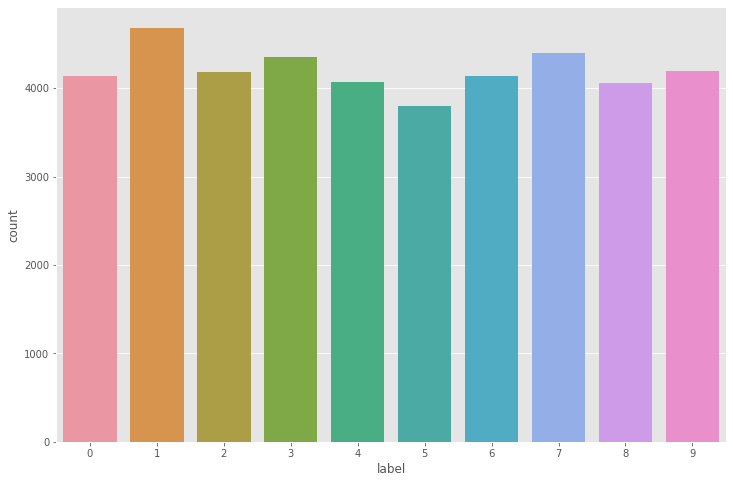

In [3]:
train = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
test = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
sample_submission = pd.read_csv('/kaggle/input/digit-recognizer/sample_submission.csv')

plt.figure(figsize = (12,8))
sns.countplot(x="label", data=train)

In [4]:
features = train.drop("label", axis=1)
label = train["label"]

features = np.array(features, dtype="float32")
label = np.array(label)
test = np.array(test, dtype="float32")

In [5]:
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size = 0.05, random_state = 0)

In [6]:
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_val = X_val.reshape(X_val.shape[0],28,28,1)
test = test.reshape(test.shape[0],28,28,1)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [7]:
print("Shape of X_train: ", X_train.shape)
print("Shape of Y_train: ", y_train.shape)
print("Shape of X_val: ", X_val.shape)
print("Shape of Y_val: ", y_val.shape)
print("Shape of Test Set: ", test.shape)

Shape of X_train:  (39900, 28, 28, 1)
Shape of Y_train:  (39900, 10)
Shape of X_val:  (2100, 28, 28, 1)
Shape of Y_val:  (2100, 10)
Shape of Test Set:  (28000, 28, 28, 1)


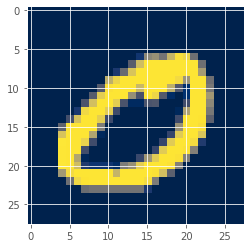

In [8]:
plt.imshow(X_train[0], cmap='cividis')

## ***Model Construction***

In [9]:
chanDim = 3
model=Sequential()

model.add(Conv2D(32, (3, 3), padding="same",input_shape=(28,28,1)))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=chanDim))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))


metrics = ['accuracy',metrics.Precision(name='precision'),metrics.Recall(name='recall')] 
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=metrics)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0

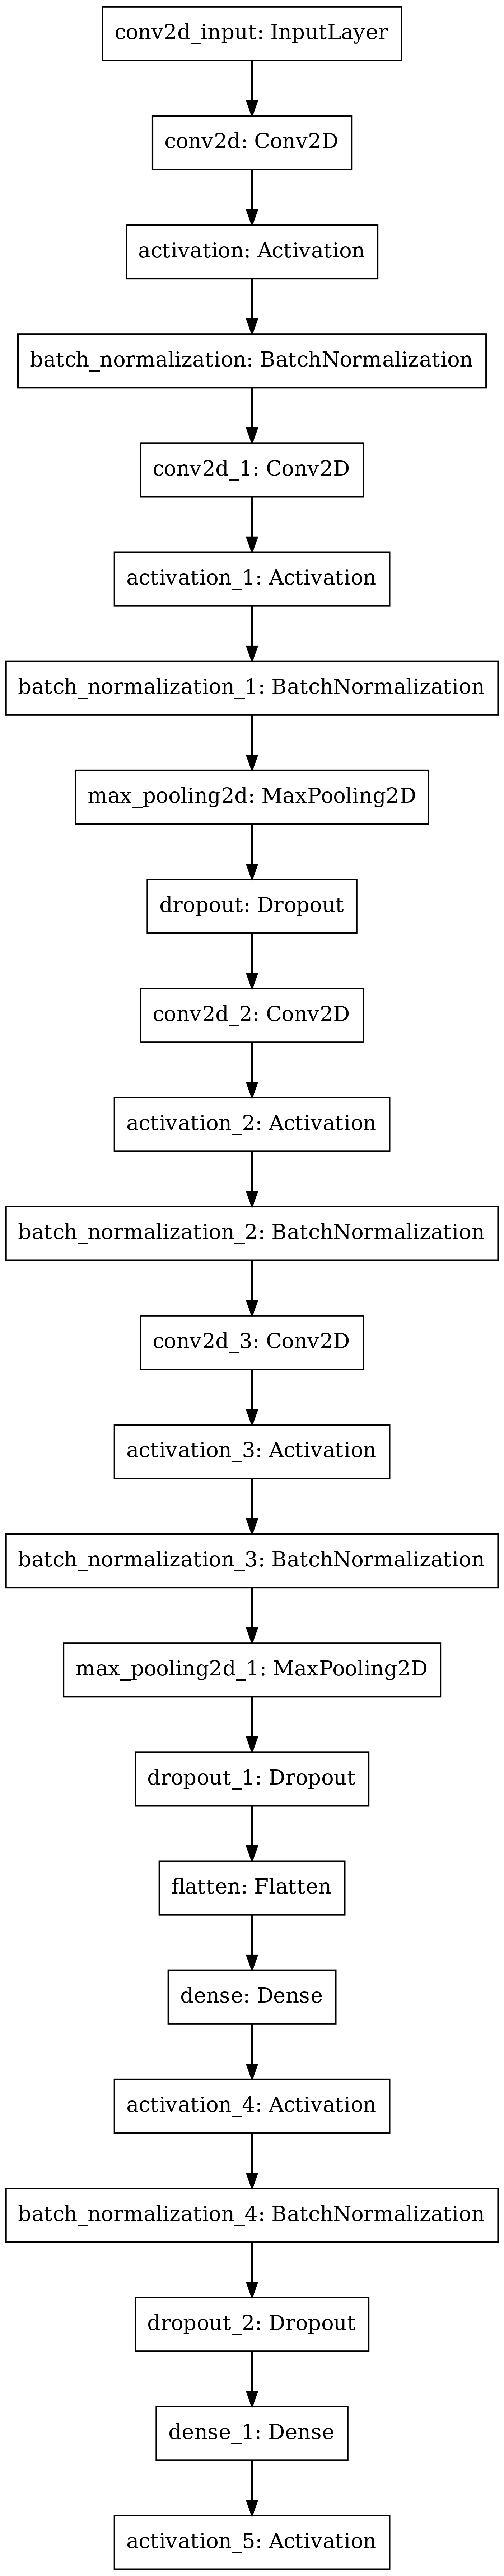

In [11]:
plot_model(model,dpi=300)

## ***Training of Model*** 

In [12]:
HR2 = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20)

Epoch 1/20
1247/1247 [==============================] - 12s 7ms/step - loss: 0.3243 - accuracy: 0.9004 - precision: 0.9217 - recall: 0.8883 - val_loss: 0.0454 - val_accuracy: 0.9876 - val_precision: 0.9876 - val_recall: 0.9871
Epoch 2/20
1247/1247 [==============================] - 9s 7ms/step - loss: 0.0691 - accuracy: 0.9783 - precision: 0.9811 - recall: 0.9761 - val_loss: 0.0393 - val_accuracy: 0.9881 - val_precision: 0.9885 - val_recall: 0.9867
Epoch 3/20
1247/1247 [==============================] - 8s 7ms/step - loss: 0.0560 - accuracy: 0.9829 - precision: 0.9844 - recall: 0.9817 - val_loss: 0.0487 - val_accuracy: 0.9867 - val_precision: 0.9871 - val_recall: 0.9848
Epoch 4/20
1247/1247 [==============================] - 8s 6ms/step - loss: 0.0487 - accuracy: 0.9852 - precision: 0.9867 - recall: 0.9843 - val_loss: 0.0323 - val_accuracy: 0.9886 - val_precision: 0.9886 - val_recall: 0.9881
Epoch 5/20
1247/1247 [==============================] - 9s 7ms/step - loss: 0.0441 - accuracy: 

## ***Performance Analysis***

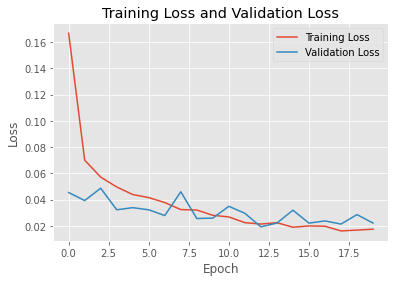

In [13]:
N = 20

plt.figure()
plt.plot(np.arange(0, N), HR2.history["loss"], label="Training Loss")
plt.plot(np.arange(0, N), HR2.history["val_loss"], label="Validation Loss")
plt.title("Training Loss and Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc="upper right")

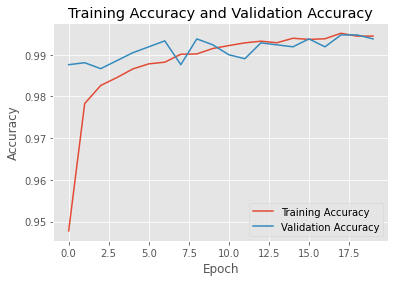

In [14]:
plt.figure()
plt.plot(np.arange(0, N), HR2.history["accuracy"], label="Training Accuracy")
plt.plot(np.arange(0, N), HR2.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training Accuracy and Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(loc="lower right")

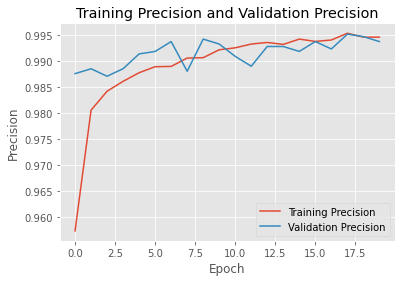

In [15]:
plt.figure()
plt.plot(np.arange(0, N), HR2.history["precision"], label="Training Precision")
plt.plot(np.arange(0, N), HR2.history["val_precision"], label="Validation Precision")
plt.title("Training Precision and Validation Precision")
plt.xlabel("Epoch")
plt.ylabel("Precision")
plt.legend(loc="lower right")

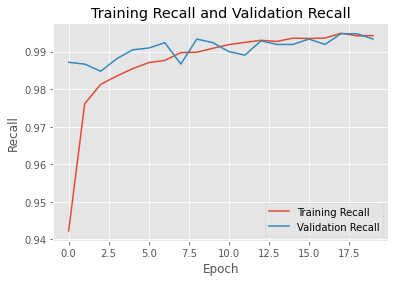

In [16]:
plt.figure()
plt.plot(np.arange(0, N), HR2.history["recall"], label="Training Recall")
plt.plot(np.arange(0, N), HR2.history["val_recall"], label="Validation Recall")
plt.title("Training Recall and Validation Recall")
plt.xlabel("Epoch")
plt.ylabel("Recall")
plt.legend(loc="lower right")

In [17]:
predIdxsVal = model.predict(X_val)
predIdxsVal = np.argmax(predIdxsVal, axis=1)

Accuracy = (accuracy_score(y_val.argmax(axis=1),predIdxsVal)*100)
print('VALIDATION ACCURACY in Percentage:', round(Accuracy,2),'%')

print("")
print("===============================================================================================================")
print("")

print(classification_report(y_val.argmax(axis=1), predIdxsVal))

VALIDATION ACCURACY in Percentage: 99.38 %


              precision    recall  f1-score   support

           0       0.99      1.00      1.00       193
           1       1.00      1.00      1.00       237
           2       1.00      1.00      1.00       208
           3       0.99      1.00      0.99       215
           4       0.99      0.99      0.99       223
           5       0.99      0.98      0.99       197
           6       0.99      1.00      1.00       204
           7       1.00      0.99      0.99       224
           8       0.99      1.00      1.00       201
           9       0.99      0.98      0.99       198

    accuracy                           0.99      2100
   macro avg       0.99      0.99      0.99      2100
weighted avg       0.99      0.99      0.99      2100



## ***Prediction on Test Set and Submission CSV File Generation***

In [18]:
predIdxs = model.predict(test)
predIdxs = np.argmax(predIdxs, axis=1)

submission = pd.DataFrame(data=np.array(predIdxs), columns=['Label'])
submission.index = np.arange(1, len(submission)+1)
submission["ImageId"] = submission.index
submission = submission[["ImageId", "Label"]]

submission.to_csv("submission.csv", index=False)